In [1]:
import numpy as np
from quantumoperators import *
import matplotlib.pyplot as plt
from hamiltonianoperators import *

In [2]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.yaxis.offsetText.set_fontsize(fs)
    ax.title.set_size(fs)

In [3]:
Ham = Hamiltonian(6,0.5,0.5)

In [4]:
Ez = np.linspace(19.8,20.2,101)*1e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

In [5]:
freq_shift_func_field = (spectrum[0][:,10] - spectrum[0][:,7]).ptp() / (Ez/1e3).ptp()
print(f"frequency shift slope = {freq_shift_func_field:.2f} Hz/kV/cm" )

frequency shift slope = 20.21 Hz/kV/cm


In [6]:
Ec = 20e3
Enr = 2
freq_shift = (Ham.spectrum(0,0,Ec+Enr,0,0,0)[0][10] - Ham.spectrum(0,0,Ec+Enr,0,0,0)[0][7]) - (Ham.spectrum(0,0,-Ec+Enr,0,0,0)[0][10] - Ham.spectrum(0,0,-Ec+Enr,0,0,0)[0][7])
print(f"frequency shift = {freq_shift*1e3:.2f} mHz")

frequency shift = -80.90 mHz


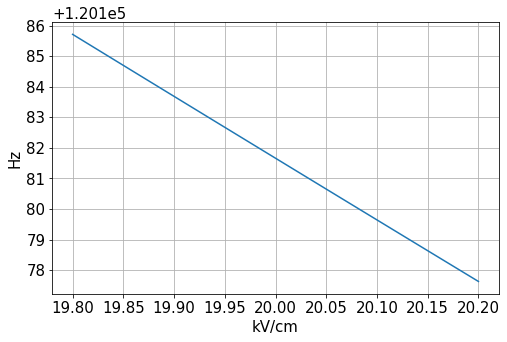

In [7]:
fig, ax= plt.subplots(figsize = (8,5))
ax.plot(Ez/1e3, spectrum[0][:,10] - spectrum[0][:,7])

ax.set_xlabel('kV/cm')
ax.set_ylabel('Hz')
ax.grid(True)
set_fontsize(ax, 15)

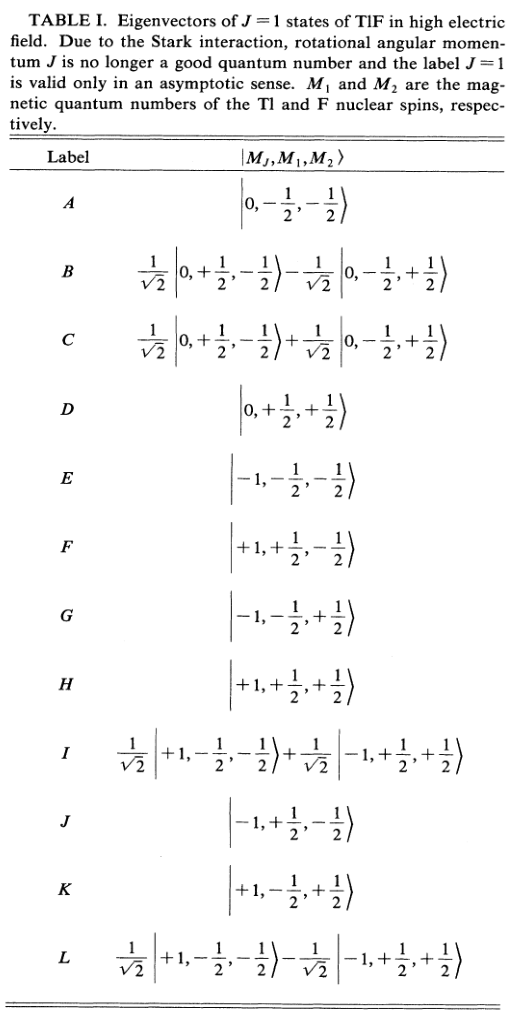

In [8]:
states = Ham.eigenstates(0,0,30e3,0,0,0,1e-1)
Jselect = 1
Jstart = (4*(2*(Jselect-1)+1))
Jstop = Jstart + 4*(2*Jselect + 1)
for idx, state in enumerate(states[1]):
    if (idx >= Jstart) & (idx < Jstop):
        print(idx)
        for dat in state.data:
                J = dat[1].J
                mJ = dat[1].mJ
                m1 = dat[1].m1
                m2 = dat[1].m2
                print(f'{dat[0].real:.2f} : {J:+d} {mJ:+d} {m1:+0.1f} {m2:+0.1f}')

4
-0.29 : +3 +1 -0.5 -0.5
0.29 : +3 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
0.77 : +2 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
1.00 : +1 -1 +0.5 +0.5
5
-0.29 : +3 -1 +0.5 +0.5
-0.29 : +3 +1 -0.5 -0.5
-0.77 : +2 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
-1.00 : +1 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
6
0.29 : +3 +1 -0.5 +0.5
0.77 : +2 +1 -0.5 +0.5
1.00 : +1 +1 -0.5 +0.5
7
-0.29 : +3 -1 +0.5 -0.5
-0.77 : +2 -1 +0.5 -0.5
-1.00 : +1 -1 +0.5 -0.5
8
-0.29 : +3 +1 +0.5 -0.5
-0.77 : +2 +1 +0.5 -0.5
-1.00 : +1 +1 +0.5 -0.5
9
0.29 : +3 -1 -0.5 +0.5
0.77 : +2 -1 -0.5 +0.5
1.00 : +1 -1 -0.5 +0.5
10
-0.14 : +2 +1 +0.5 +0.5
-0.18 : +1 +1 +0.5 +0.5
-0.29 : +3 -1 -0.5 -0.5
-0.77 : +2 -1 -0.5 -0.5
-1.00 : +1 -1 -0.5 -0.5
11
-0.14 : +2 -1 -0.5 -0.5
-0.18 : +1 -1 -0.5 -0.5
0.29 : +3 +1 +0.5 +0.5
0.77 : +2 +1 +0.5 +0.5
1.00 : +1 +1 +0.5 +0.5
12
0.15 : +4 +0 -0.5 -0.5
0.30 : +1 +0 -0.5 -0.5
0.55 : +3 +0 -0.5 -0.5
-0.89 : +0 +0 -0.5 -0.5
1.00 : +2 +0 -0.5 -0.5
13
0.15 : +4 +0 +0.5 +0.5
0.30 : +1 +0 +0.5 +0.5
0.55 : +3 

In [9]:
lines_idx = {'L':4, 'I':5, 'K':6, 'J':7, 'F':8, 'G':9, 'E':10, 'H':11, 'D':12, 'A':13, 'C':14, 'B':15}

In [10]:
lines = {'A': (1,0,-0.5,-0.5), 'D': (1,0,+0.5,+0.5), 'E': (1,-1,-0.5,-0.5), 'F': (1,+1,+0.5,-0.5),
         'G': (1,-1,-0.5,+0.5), 'H': (1,+1,+0.5,+0.5), 'J': (1,-1,+0.5,-0.5), 'K': (1,+1,-0.5,+0.5),
         'I': [(1,+1,-0.5,-0.5),(1,-1,-0.5,+0.5)], 'L': [(1,+1,-0.5,-0.5), (1,-1,0,0.5,-0.5)]}
transitions = [('J', 'E'), ('K', 'H'), ('I', 'F'), ('I', 'G'), ('L', 'F'), ('L', 'G'), 
               ('F', 'H'), ('G', 'E'), ('J', 'F'), ('K', 'G'), ('I','L')]

In [11]:
# states and qns for J=1 states, lists the amplitude sign difference for superposition states
# taken from Hinds (1991)
lines = {'A': {'qns': (1,0,-0.5,-0.5)}, 'D': {'qns': (1,0,+0.5,+0.5)}, 'E': {'qns': (1,-1,-0.5,-0.5)}, 
         'F': {'qns': (1,+1,+0.5,-0.5)}, 'G': {'qns':(1,-1,-0.5,+0.5)}, 'H': {'qns':(1,+1,+0.5,+0.5)}, 
         'J': {'qns': (1,-1,+0.5,-0.5)}, 'K': {'qns': (1,+1,-0.5,+0.5)}, 
         'I': {'qns': [(1,+1,-0.5,-0.5), (1,-1,+0.5,+0.5)], 'amp': +1}, 
         'L': {'qns': [(1,+1,-0.5,-0.5), (1,-1,+0.5,+0.5)], 'amp': -1},
         'B': {'qns': [(1,+0,+0.5,-0.5), (1,+0,-0.5,+0.5)], 'amp': -1},
         'C': {'qns': [(1,+0,+0.5,-0.5), (1,+0,-0.5,+0.5)], 'amp': 1},}

In [12]:
import collections 

states_idx = {}

Jselect = 1

# Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
# so can use the indices to select J states until that point
Jstart = (4*(2*(Jselect-1)+1))
Jstop = Jstart + 4*(2*Jselect + 1)

for idx, state in enumerate(states[1]):
    # selection J state
    if (idx >= Jstart) & (idx < Jstop):
        for line, dat in lines.items():
            # check superposition state
            if isinstance(dat.get('qns'), list):
                configs = state.data[-2:]
                amps = [c[0] for c in configs]
                # check if amplitudes are sufficiently close to each other
                if np.abs(amps[0]) - np.abs(amps[1]) < 1e-3:
                    # check amplitude sign difference
                    if dat.get('amp') == np.sign(np.product(amps)) :
                        qns = [(c[1].mJ, c[1].m1, c[1].m2) for c in configs]
                        line_qns = [d[1:] for d in dat.get('qns')]
                        # verify quantum numbers
                        if collections.Counter(qns) == collections.Counter(line_qns):
                            states_idx[line] = idx
                            break
            # check single state
            else:
                config_qns = state.data[-1][1]
                config_qns = (config_qns.mJ, config_qns.m1, config_qns.m2)
                if config_qns == dat.get('qns')[1:]:
                    states_idx[line] = idx      
                    break
states_idx

{'L': 4,
 'I': 5,
 'K': 6,
 'J': 7,
 'F': 8,
 'G': 9,
 'E': 10,
 'H': 11,
 'A': 12,
 'D': 13,
 'C': 14,
 'B': 15}

In [13]:
lines_energy = {}
for line, idx in states_idx.items():
    lines_energy[line] = states[0][idx]
    
lines_energy

{'L': -8513418870.563804,
 'I': -8513415164.361952,
 'K': -8513393103.882411,
 'J': -8513393103.88232,
 'F': -8513284123.688453,
 'G': -8513284123.688412,
 'E': -8513273097.470747,
 'H': -8513273097.470747,
 'A': 12453200786.334894,
 'D': 12453200786.334911,
 'C': 12453201759.958399,
 'B': 12453214410.84554}

In [14]:
print('*'*75)
for transition in transitions:
    dE = lines_energy[transition[0]] - lines_energy[transition[1]]
    print(f'{transition} df : {np.abs(dE)/1e3:.7f} kHz')
    s1, s2 = lines[transition[0]], lines[transition[1]]
    print(f'{s1.get("qns")} -> {s2.get("qns")}')
    print('*'*75)

***************************************************************************
('J', 'E') df : 120.0064116 kHz
(1, -1, 0.5, -0.5) -> (1, -1, -0.5, -0.5)
***************************************************************************
('K', 'H') df : 120.0064117 kHz
(1, 1, -0.5, 0.5) -> (1, 1, 0.5, 0.5)
***************************************************************************
('I', 'F') df : 131.0406735 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, 1, 0.5, -0.5)
***************************************************************************
('I', 'G') df : 131.0406735 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, -1, -0.5, 0.5)
***************************************************************************
('L', 'F') df : 134.7468754 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, 1, 0.5, -0.5)
***************************************************************************
('L', 'G') df : 134.7468754 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, -1, -0.5, 0.5)
**************************

In [15]:
print('*'*75)
for transition in [('F','J'), ('G','K'), ('F','K'), ('G','J')]:
    dE = lines_energy[transition[0]] - lines_energy[transition[1]]
    print(f'{transition} df : {np.abs(dE)/1e3:.7f} kHz')
    s1, s2 = lines[transition[0]], lines[transition[1]]
    print(f'{s1.get("qns")} -> {s2.get("qns")}')
    print('*'*75)

***************************************************************************
('F', 'J') df : 108.9801939 kHz
(1, 1, 0.5, -0.5) -> (1, -1, 0.5, -0.5)
***************************************************************************
('G', 'K') df : 108.9801940 kHz
(1, -1, -0.5, 0.5) -> (1, 1, -0.5, 0.5)
***************************************************************************
('F', 'K') df : 108.9801940 kHz
(1, 1, 0.5, -0.5) -> (1, 1, -0.5, 0.5)
***************************************************************************
('G', 'J') df : 108.9801939 kHz
(1, -1, -0.5, 0.5) -> (1, -1, 0.5, -0.5)
***************************************************************************


## Motional Magnetic Field
$ B_{mot} = \frac{\vec v}{c^2} \times \vec E$  
For 180 m/s and 30kV/cm this gives $B_{mot} = 6\times 10^{-5} G$

Code below is not accurate because even though the quantum numbers all agree with whatever state I choose (e.g. J), the energy levels hop arround. Just using spectrum and subtracting works, and gives comparable results as compared to the Ramsey paper.
Comes about because the field perpendicular to z couples states with opposite spins, so it looks like a bunch of similar superposition states.

In [16]:
import collections 

transitions = [('J','E'), ('K','H')]

Bmot = 6e-5

description = ['No external field', '100 muG in Bz', '100 muG Bx', '-100 muG in Bx', '1 muG in Bx', '50 mG in Bx']
states_list = [(Ham.eigenstates(0,0,30e3,Bmot,0,0,1e-1), Ham.eigenstates(0,0,-30e3,-Bmot,0,0,1e-1)), 
               (Ham.eigenstates(0,0,30e3,Bmot,0,1e-4,1e-1), Ham.eigenstates(0,0,-30e3,0,-Bmot,1e-4,1e-1)), 
               (Ham.eigenstates(0,0,30e3,1e-4+Bmot,0,0,1e-1), Ham.eigenstates(0,0,-30e3,1e-4-Bmot,0,0,1e-1)), 
               (Ham.eigenstates(0,0,30e3,-1e-4+Bmot,0,0,1e-1), Ham.eigenstates(0,0,-30e3,-1e-4-Bmot,0,0,1e-1)),
               (Ham.eigenstates(0,0,30e3,1e-6+Bmot,0,0,1e-1), Ham.eigenstates(0,0,-30e3,1e-6-Bmot,0,0,1e-1)),
               (Ham.eigenstates(0,0,30e3,50e-3+Bmot,0,0,1e-1), Ham.eigenstates(0,0,-30e3,50e-3-Bmot,0,0,1e-1))]

for desc, states in zip(description, states_list):
    transition_list = {}
    for state_opp in states:
        states_idx = {}

        Jselect = 1

        # Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
        # so can use the indices to select J states until that point
        Jstart = (4*(2*(Jselect-1)+1))
        Jstop = Jstart + 4*(2*Jselect + 1)

        for idx, state in enumerate(state_opp[1]):
            # selection J state
            if (idx >= Jstart) & (idx < Jstop):
                for line, dat in lines.items():
                    # check superposition state
                    if isinstance(dat.get('qns'), list):
                        configs = state.data[-2:]
                        amps = [c[0] for c in configs]
                        # check if amplitudes are sufficiently close to each other
                        if np.abs(amps[0]) - np.abs(amps[1]) < 1e-3:
                            # check amplitude sign difference
                            if dat.get('amp') == np.sign(np.product(amps)) :
                                qns = [(c[1].mJ, c[1].m1, c[1].m2) for c in configs]
                                line_qns = [d[1:] for d in dat.get('qns')]
                                # verify quantum numbers
                                if collections.Counter(qns) == collections.Counter(line_qns):
                                    states_idx[line] = idx
                                    break
                    # check single state
                    else:
                        config_qns = state.data[-1][1]
                        config_qns = (config_qns.mJ, config_qns.m1, config_qns.m2)
                        if config_qns == dat.get('qns')[1:]:
                            states_idx[line] = idx      
                            break
        lines_energy = {}
        for line, idx in states_idx.items():
            lines_energy[line] = state_opp[0][idx]
        for transition in transitions:
            dE = lines_energy[transition[0]] - lines_energy[transition[1]]
            try:
                transition_list[transition] -= dE
            except:
                transition_list[transition] = dE    
    print(desc)
    print('='*40)
    for transition, dE in transition_list.items():
        print(f'transition {transition} : {dE *1e6:.2e} muHz')
    print('='*40)
    print()

No external field
transition ('J', 'E') : 0.00e+00 muHz
transition ('K', 'H') : 0.00e+00 muHz

100 muG in Bz
transition ('J', 'E') : -1.86e+02 muHz
transition ('K', 'H') : 2.86e+00 muHz

100 muG Bx
transition ('J', 'E') : -7.25e+01 muHz
transition ('K', 'H') : 5.53e+01 muHz

-100 muG in Bx
transition ('J', 'E') : 7.25e+01 muHz
transition ('K', 'H') : -5.53e+01 muHz

1 muG in Bx
transition ('J', 'E') : 1.24e+01 muHz
transition ('K', 'H') : -2.00e+02 muHz

50 mG in Bx
transition ('J', 'E') : -2.36e+03 muHz
transition ('K', 'H') : -1.93e+03 muHz



In [17]:
import collections 

def check_level_match(state, level):
    # check superposition state
    if isinstance(level.get('qns'), list):
        amps = [s[0] for s in state.data[-2:]]
       # check if amplitudes are sufficiently close to each other
        if np.abs(amps[0]) - np.abs(amps[1]) < 1e-12:
            # check amplitude sign difference
            if level.get('amp') == np.sign(np.product(amps)):
                qns_state = tuple((s[1].mJ, s[1].m1, s[1].m2) for s in state.data[-2:])
                qns_level = tuple(l[1:] for l in level.get('qns'))
                if collections.Counter(qns_state) == collections.Counter(qns_level):
                    return True
                
     # check single state
    else:
        s = state.data[-1][1]
        qns_state = (s.mJ, s.m1, s.m2)
        if qns_state == level.get('qns')[1:]:
            return True
    return False

In [18]:
import collections 

transitions = [('J','E'), ('K','H')]

Bmot = 6e-5

shift_list = {trans:[] for trans in transitions}
Blist = np.linspace(-50e-3,50e-3,51)
energies1 = {line:[] for line in lines.keys()}
energies2 = {line:[] for line in lines.keys()}
idx_list1 = {line:[] for line in lines.keys()}
idx_list2 = {line:[] for line in lines.keys()}

for Bx in Blist:
    states = (Ham.eigenstates(0,0,30e3,Bx+Bmot,0,0,1e-1), Ham.eigenstates(0,0,-30e3,Bx-Bmot,0,0,1e-1))
    transition_list = {}
    for i, state_opp in enumerate(states):
        states_idx = {}

        Jselect = 1

        # Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
        # so can use the indices to select J states until that point
        Jstart = (4*(2*(Jselect-1)+1))
        Jstop = Jstart + 4*(2*Jselect + 1)

        for idx, state in enumerate(state_opp[1]):
            # selection J state
            if (idx >= Jstart) & (idx < Jstop):
                for line, dat in lines.items():
                    # check superposition state
                    if check_level_match(state, lines[line]):
                        states_idx[line] = idx
                        break
                            
#         state_opp[1][states_idx['J']].data[-1][1].print_quantum_numbers()
        
        lines_energy = {}
        for line, idx in states_idx.items():
            lines_energy[line] = state_opp[0][idx]
            if i == 0:
                energies1[line].append(state_opp[0][idx])
                idx_list1[line].append(idx)
            else:
                energies2[line].append(state_opp[0][idx])
                idx_list2[line].append(idx)
        for transition in transitions:
            dE = lines_energy[transition[0]] - lines_energy[transition[1]]
            try:
                transition_list[transition] -= dE
            except:
                transition_list[transition] = dE
    for key,val in transition_list.items():
        shift_list[key].append(val)

In [19]:
for idx in range(4,16):
    print('=='*25)
    print(idx)
    print('=='*25)
    for basisstate in states[0][1][idx].data:
        amp = basisstate[0]
        s = basisstate[1]
        print(f"|{s.J}, {s.mJ:2}, {s.m1:4}, {s.m2:4}> : {amp}")

4
|3, -1,  0.5,  0.5> : (0.2863600104472836+0j)
|3,  1, -0.5, -0.5> : (-0.28636001236570513+0j)
|2, -1,  0.5,  0.5> : (0.7666439866851364+0j)
|2,  1, -0.5, -0.5> : (-0.7666439918211415+0j)
|1, -1,  0.5,  0.5> : (0.9999999933006638+0j)
|1,  1, -0.5, -0.5> : (-1+0j)
5
|3,  1, -0.5, -0.5> : (-0.2863600202657032+0j)
|3, -1,  0.5,  0.5> : (-0.2863600221839888+0j)
|2,  1, -0.5, -0.5> : (-0.7666440039792932+0j)
|2, -1,  0.5,  0.5> : (-0.7666440091149352+0j)
|1,  1, -0.5, -0.5> : (-0.9999999933011386+0j)
|1, -1,  0.5,  0.5> : (-1+0j)
6
|3,  1, -0.5,  0.5> : (-0.28635916656135313+0j)
|3, -1,  0.5, -0.5> : (0.2863600071566367+0j)
|2,  1, -0.5,  0.5> : (-0.7666417321985973+0j)
|2, -1,  0.5, -0.5> : (0.7666439826431413+0j)
|1,  1, -0.5,  0.5> : (-0.9999970645506986+0j)
|1, -1,  0.5, -0.5> : (1+0j)
7
|3, -1,  0.5, -0.5> : (-0.2863591665510223+0j)
|3,  1, -0.5,  0.5> : (-0.2863600071566382+0j)
|2, -1,  0.5, -0.5> : (-0.7666417321709373+0j)
|2,  1, -0.5,  0.5> : (-0.7666439826431435+0j)
|1, -1,  0.5,

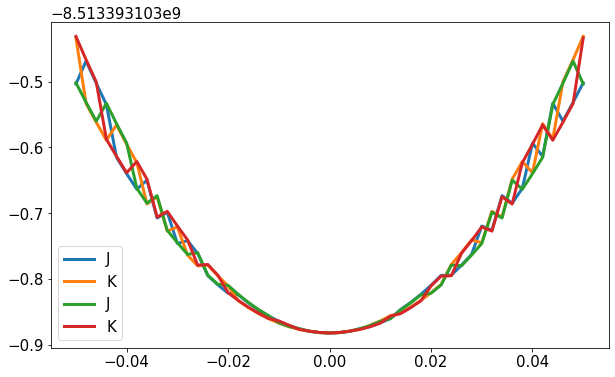

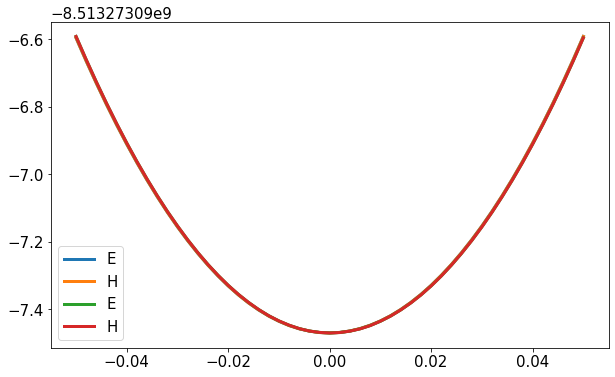

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(Blist, energies1['J'], label = 'J', lw = 3)
ax.plot(Blist, energies1['K'], label = 'K', lw = 3)
ax.plot(Blist, energies2['J'], label = 'J', lw = 3)
ax.plot(Blist, energies2['K'], label = 'K', lw = 3)
ax.legend(fontsize = 15)

set_fontsize(ax, 15)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(Blist, energies1['E'], label = 'E', lw = 3)
ax.plot(Blist, energies1['H'], label = 'H', lw = 3)
ax.plot(Blist, energies2['E'], label = 'E', lw = 3)
ax.plot(Blist, energies2['H'], label = 'H', lw = 3)
ax.legend(fontsize = 15)

set_fontsize(ax, 15)

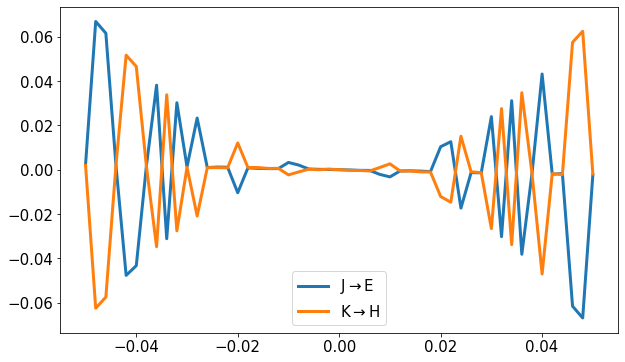

In [21]:
fig, ax = plt.subplots(figsize = (10,6))
for transition in transitions:
    ax.plot(Blist, shift_list[transition], lw = 3, label = r'{}$\rightarrow${}'.format(transition[0], transition[1]))
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

### Working method

### Result Ramsey
$B_{mot} =60~\mu$G from 280 m/s and 20 kV/cm

J->E : 1.96 mHz @ 50 mG
K->H : 2.32 mHz @ 50 mG


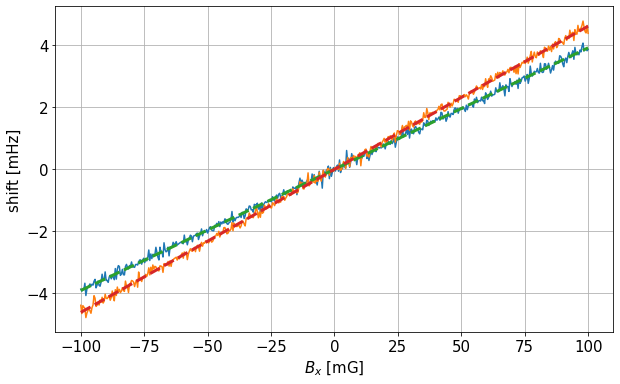

In [22]:
Bmot = 6e-5

Bx = np.linspace(-100e-3,100e-3,501)
Ez = np.ones(len(Bx))*20e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum1 = Ham.spectrum(Ex,Ey,Ez,Bx+Bmot,By,Bz)
spectrum2 = Ham.spectrum(Ex,Ey,-Ez,Bx-Bmot,By,Bz)

fig, ax = plt.subplots(figsize = (10,6))

JE = (spectrum1[0][:,10] - spectrum1[0][:,7]) - (spectrum2[0][:,10] - spectrum2[0][:,7])
KH = (spectrum1[0][:,11] - spectrum1[0][:,6]) - (spectrum2[0][:,11] - spectrum2[0][:,6])

# Make sure the fit intercepts zero since there is no shift at Bx=0
XX = np.vstack((Bx ** 3, Bx ** 2, Bx)).T
p_JE = np.linalg.lstsq(XX, JE, rcond=0)[0]
JE_Bmot = lambda x: p_JE@np.vstack((x ** 3, x ** 2, x))

p_KH = np.linalg.lstsq(XX, KH, rcond=0)[0]
KH_Bmot = lambda x: p_KH@np.vstack((x ** 3, x ** 2, x))

ax.plot(Bx*1e3, JE*1e3)
ax.plot(Bx*1e3, KH*1e3)
ax.plot(Bx*1e3, JE_Bmot(Bx)*1e3, '--', lw = 3)
ax.plot(Bx*1e3, KH_Bmot(Bx)*1e3, '--', lw = 3)

ax.grid(True)

ax.set_xlabel('$B_x$ [mG]')
ax.set_ylabel('shift [mHz]')

set_fontsize(ax, 15)

print(f'J->E : {JE_Bmot(50e-3)[0]*1e3:.2f} mHz @ 50 mG')
print(f'K->H : {KH_Bmot(50e-3)[0]*1e3:.2f} mHz @ 50 mG')

### CeNTREX
$B_{mot} = 60~\mu$G

J->E : 4.09 uHz @ 100 muG
K->H : 4.74 uHz @ 100 muG
J->E : 0.41 uHz @ 10 muG
K->H : 0.47 uHz @ 10 muG


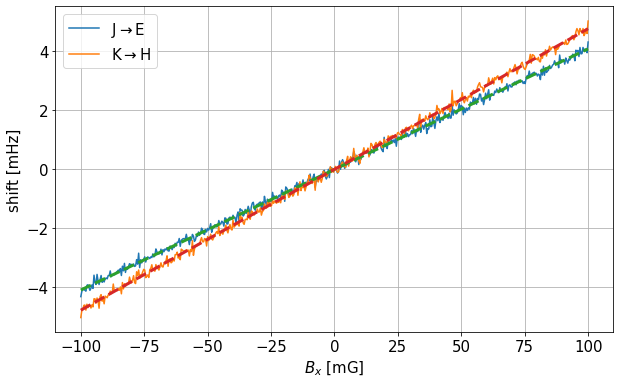

In [23]:
Bmot = 6e-5

Bx = np.linspace(-100e-3,100e-3,501)
Ez = np.ones(len(Bx))*30e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum1 = Ham.spectrum(Ex,Ey,Ez,Bx+Bmot,By,Bz)
spectrum2 = Ham.spectrum(Ex,Ey,-Ez,Bx-Bmot,By,Bz)

fig, ax = plt.subplots(figsize = (10,6))

JE = (spectrum1[0][:,10] - spectrum1[0][:,7]) - (spectrum2[0][:,10] - spectrum2[0][:,7])
KH = (spectrum1[0][:,11] - spectrum1[0][:,6]) - (spectrum2[0][:,11] - spectrum2[0][:,6])

# Make sure the fit intercepts zero since there is no shift at Bx=0
XX = np.vstack((Bx ** 3, Bx ** 2, Bx)).T
p_JE = np.linalg.lstsq(XX, JE, rcond=0)[0]
JE_Bmot = lambda x: p_JE@np.vstack((x ** 3, x ** 2, x))

p_KH = np.linalg.lstsq(XX, KH, rcond=0)[0]
KH_Bmot = lambda x: p_KH@np.vstack((x ** 3, x ** 2, x))

ax.plot(Bx*1e3, JE*1e3, label = r'J$\rightarrow$E')
ax.plot(Bx*1e3, KH*1e3, label = r'K$\rightarrow$H')
ax.plot(Bx*1e3, JE_Bmot(Bx)*1e3, '--', lw = 3)
ax.plot(Bx*1e3, KH_Bmot(Bx)*1e3, '--', lw = 3)

ax.legend(fontsize = 15)
ax.set_xlabel('$B_x$ [mG]')
ax.set_ylabel('shift [mHz]')

ax.grid(True)

set_fontsize(ax, 15)

print(f'J->E : {JE_Bmot(100e-6)[0]*1e6:.2f} uHz @ 100 muG')
print(f'K->H : {KH_Bmot(100e-6)[0]*1e6:.2f} uHz @ 100 muG')

print(f'J->E : {JE_Bmot(10e-6)[0]*1e6:.2f} uHz @ 10 muG')
print(f'K->H : {KH_Bmot(10e-6)[0]*1e6:.2f} uHz @ 10 muG')

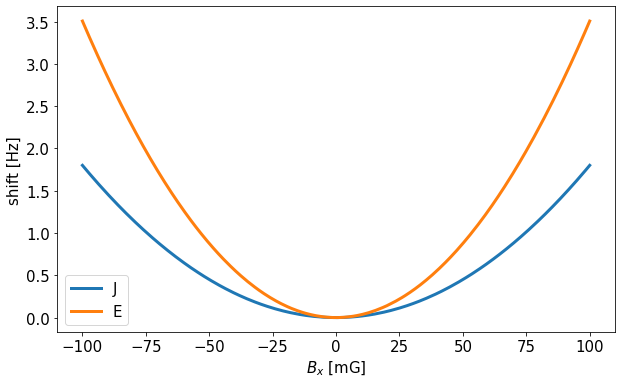

In [24]:
spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(Bx*1e3, spectrum[0][:,7]-np.min(spectrum[0][:,7]), lw = 3, label = 'J')

ax.plot(Bx*1e3, spectrum[0][:,10]-np.min(spectrum[0][:,10]), lw = 3, label = 'E')

ax.legend(fontsize = 15)
ax.set_xlabel(f'$B_x$ [mG]')
ax.set_ylabel(f'shift [Hz]')
set_fontsize(ax, 15)

### No Motional Magnetic Field

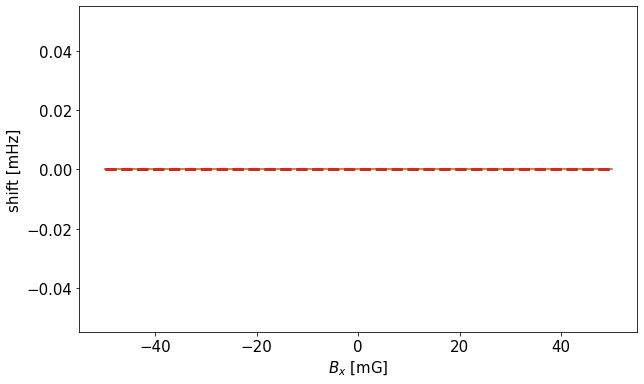

In [25]:
Bmot = 0

Bx = np.linspace(-50e-3,50e-3,501)
Ez = np.ones(len(Bx))*30e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum1 = Ham.spectrum(Ex,Ey,Ez,Bx+Bmot,By,Bz)
spectrum2 = Ham.spectrum(Ex,Ey,-Ez,Bx-Bmot,By,Bz)

fig, ax = plt.subplots(figsize = (10,6))

JE = (spectrum1[0][:,10] - spectrum1[0][:,7]) - (spectrum2[0][:,10] - spectrum2[0][:,7])
KH = (spectrum1[0][:,11] - spectrum1[0][:,6]) - (spectrum2[0][:,11] - spectrum2[0][:,6])

# Make sure the fit intercepts zero since there is no shift at Bx=0
XX = np.vstack((Bx ** 3, Bx ** 2, Bx)).T
p_JE = np.linalg.lstsq(XX, JE, rcond=0)[0]
JE_Bmot = lambda x: p_JE@np.vstack((x ** 3, x ** 2, x))

p_KH = np.linalg.lstsq(XX, KH, rcond=0)[0]
KH_Bmot = lambda x: p_KH@np.vstack((x ** 3, x ** 2, x))

ax.plot(Bx*1e3, JE*1e3)
ax.plot(Bx*1e3, KH*1e3)
ax.plot(Bx*1e3, JE_Bmot(Bx)*1e3, '--', lw = 3)
ax.plot(Bx*1e3, KH_Bmot(Bx)*1e3, '--', lw = 3)

ax.set_xlabel('$B_x$ [mG]')
ax.set_ylabel('shift [mHz]')

set_fontsize(ax, 15)

## Recreate Plots from Paper

In [26]:
Ez = np.linspace(0,30.2,501)*1e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

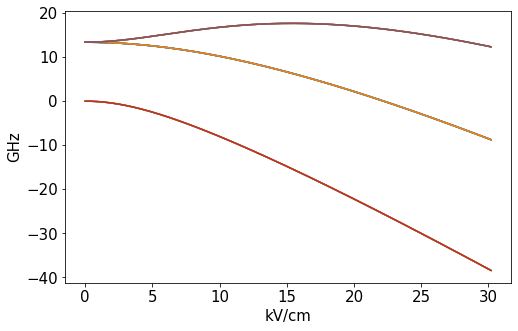

In [27]:
fig, ax= plt.subplots(figsize = (8,5))
ax.plot(Ez/1e3, spectrum[0][:,:16]/1e9)

ax.set_xlabel('kV/cm')
ax.set_ylabel('GHz')
set_fontsize(ax, 15)

In [28]:
Ez = np.linspace(0,60.2e3,501)
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.ones(len(Ez))*18.4

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

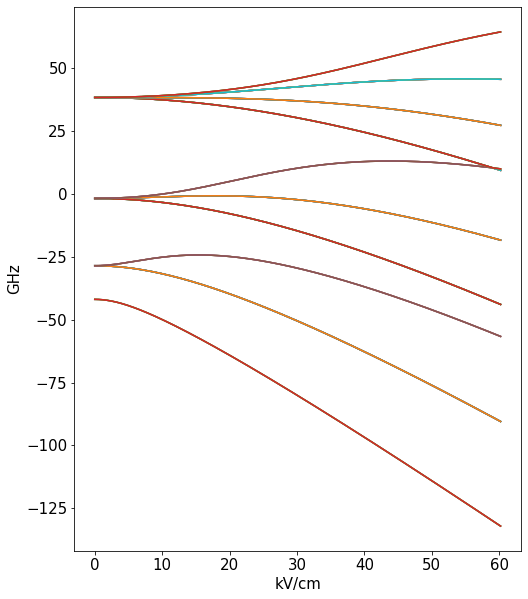

In [29]:
Jmax = 3
idx_max = np.sum([4*(2*J+1) for J in range(Jmax+1)])
fig, ax= plt.subplots(figsize = (8,10))
ax.plot(Ez/1e3, (spectrum[0][:,:64]-spectrum[0][:,:64].mean())/1e9)

ax.set_xlabel('kV/cm')
ax.set_ylabel('GHz')
set_fontsize(ax, 15)

In [30]:
Ez = np.linspace(0,70,501)
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.ones(len(Ez))*18.4

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

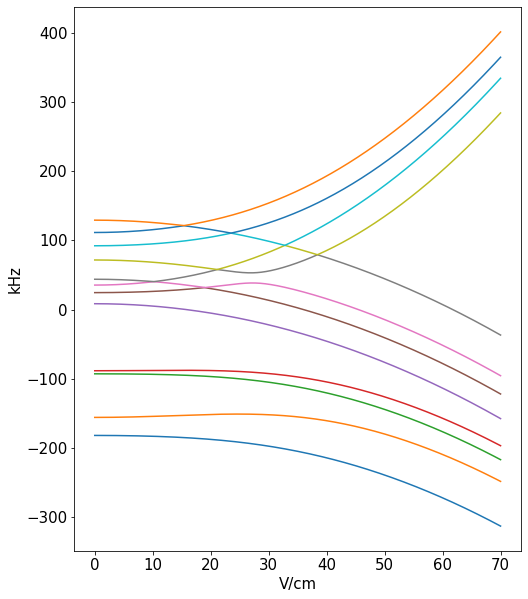

In [31]:
fig, ax= plt.subplots(figsize = (8,10))
ax.plot(Ez, (spectrum[0][:,4:16]-spectrum[0][:,4:16].mean())/1e3)

ax.set_xlabel('V/cm')
ax.set_ylabel('kHz')
set_fontsize(ax, 15)

# Check how H$_z$ Couples under B$_x$
Use pertubation theory to get estimate of energy shift

In [32]:
for idx in range(4,16):
    Ham.QN[idx].print_quantum_numbers()

1 -1 -0.5 -0.5
1 -1 -0.5 +0.5
1 -1 +0.5 -0.5
1 -1 +0.5 +0.5
1 +0 -0.5 -0.5
1 +0 -0.5 +0.5
1 +0 +0.5 -0.5
1 +0 +0.5 +0.5
1 +1 -0.5 -0.5
1 +1 -0.5 +0.5
1 +1 +0.5 -0.5
1 +1 +0.5 +0.5


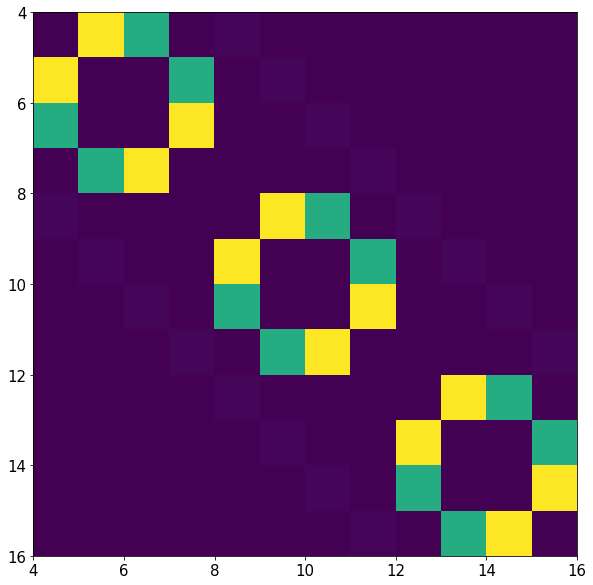

In [33]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(np.abs(Ham.HZx_m)[4:16,4:16], extent = [4,16,16,4])
set_fontsize(ax, 15)

### Couplings between states in J=1 due to a magnetic field in B$_x$

In [34]:
def HZxTl(psi):
    return -mu_Tl/psi.I1*I1x(psi)
HZxTl_m = HMatElems(HZxTl, Ham.QN)

def HZxF(psi):
    return -mu_F/psi.I2*I2x(psi)
HZxF_m = HMatElems(HZxF, Ham.QN)

In [35]:
labels_basis = []
for idx in range(4,16):
    s = Ham.QN[idx]
    labels_basis.append(f'|{s.J}, {s.mJ:2}, {s.m1:4}, {s.m2:4}>')
    print(f'{idx:2} : |{s.J}, {s.mJ:2}, {s.m1:4}, {s.m2:4}>')

 4 : |1, -1, -0.5, -0.5>
 5 : |1, -1, -0.5,  0.5>
 6 : |1, -1,  0.5, -0.5>
 7 : |1, -1,  0.5,  0.5>
 8 : |1,  0, -0.5, -0.5>
 9 : |1,  0, -0.5,  0.5>
10 : |1,  0,  0.5, -0.5>
11 : |1,  0,  0.5,  0.5>
12 : |1,  1, -0.5, -0.5>
13 : |1,  1, -0.5,  0.5>
14 : |1,  1,  0.5, -0.5>
15 : |1,  1,  0.5,  0.5>


In [36]:
labels_hinds = ['E','G','J','I-L','A','B+C','D','B-C','I+L','K','F','H']
labels = [f"{l2}; {l1}" for l1,l2 in zip(labels_basis, labels_hinds)]

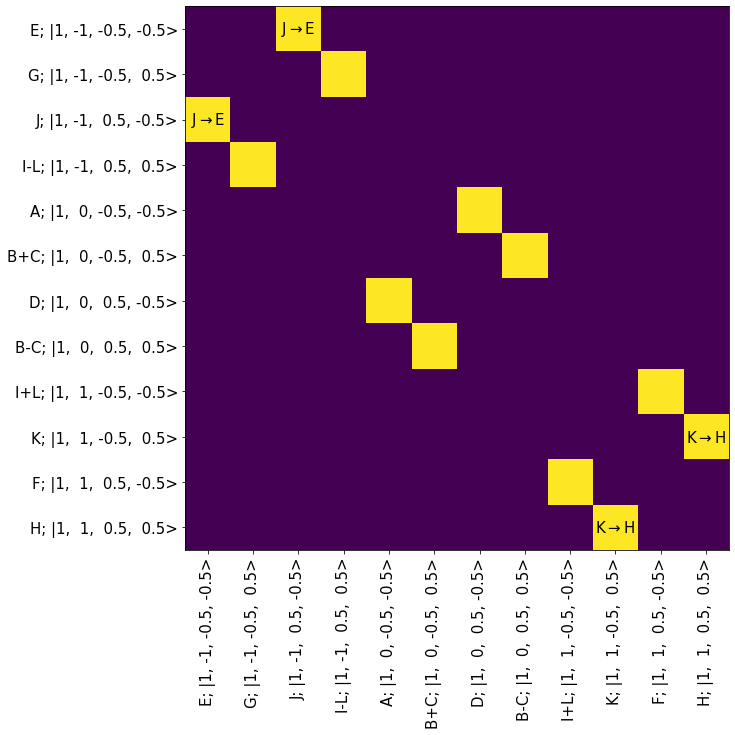

In [37]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(np.abs(HZxTl_m)[4:16,4:16], extent = [4,16,16,4])
ax.set_xticks(np.arange(4,16)+0.5)
ax.set_xticklabels(labels, rotation = 'vertical')
ax.set_yticks(np.arange(4,16)+0.5)
ax.set_yticklabels(labels)

transitions = [(4,6),(5,7),(8,10),(9,11),(12,14),(13,15)]
texts = [r'J$\rightarrow$E', r'', r'', r'', r'', r'K$\rightarrow$H']

fs = 15

for (i,j),t in zip(transitions, texts):
    text = ax.text(j+0.5, i+0.5, t, ha="center", va="center", color="k", fontsize = fs)
    text = ax.text(i+0.5, j+0.5, t, ha="center", va="center", color="k", fontsize = fs)

set_fontsize(ax, 15)

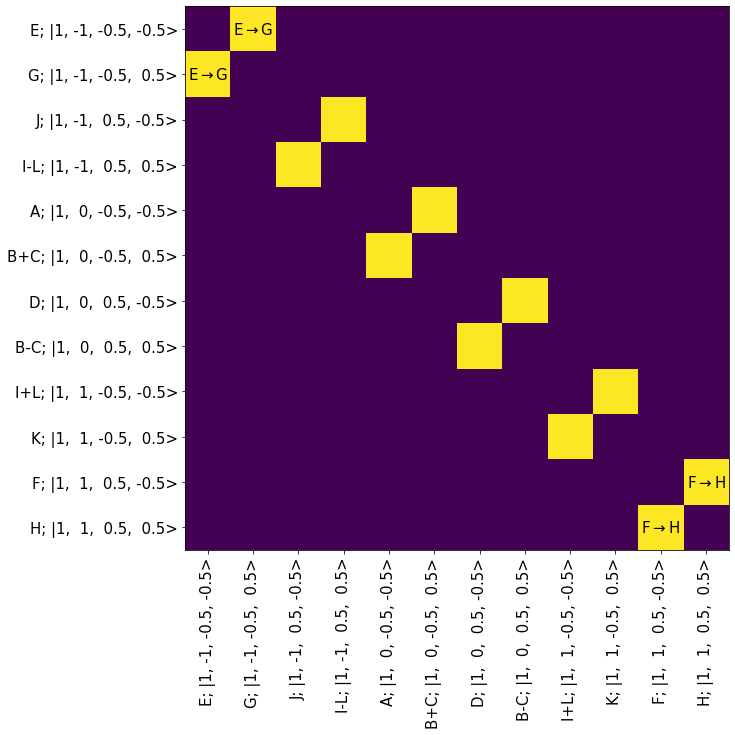

In [38]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(np.abs(HZxF_m)[4:16,4:16], extent = [4,16,16,4])
ax.set_xticks(np.arange(4,16)+0.5)
ax.set_xticklabels(labels, rotation = 'vertical')
ax.set_yticks(np.arange(4,16)+0.5)
ax.set_yticklabels(labels)

transitions = [(4,5),(6,7),(8,9),(10,11),(12,13),(14,15)]
texts = [r'E$\rightarrow$G', r'', r'', r'', r'', r'F$\rightarrow$H']

for (i,j),t in zip(transitions, texts):
    text = ax.text(j+0.5, i+0.5, t, ha="center", va="center", color="k", fontsize = fs)
    text = ax.text(i+0.5, j+0.5, t, ha="center", va="center", color="k", fontsize = fs)
    
set_fontsize(ax, 15)

### Couplings in J=1 due to the $-\frac{\mu_1}{I_1}\left(\vec I_1 \cdot \vec B\right)$ term in the Zeeman Hamiltonian

## Pertubation Theory
$$\left(H_0 + \lambda V\right)\left|\varphi_k\right\rangle; ~\left|\varphi_k\right\rangle = \left|\varphi_k^{(0)}\right\rangle+\lambda \left|\varphi_k^{(1)}\right\rangle + \lambda^2\left|\varphi_k^{(2)}\right\rangle+...;~ E_k = E_k^{(0)}+\lambda E_k^{(1)} + \lambda^2 E_k^{(2)} + ...$$

For small $\lambda$ : $$\left(H_0 + \lambda V\right)\left|\varphi_k\right\rangle = \left(E_k^{(0)}\right)\left|\varphi_k\right\rangle \rightarrow \left(E_k^{(0)}-H_0\right)\left|\varphi_k\right\rangle = \left(\lambda V - \Delta_k\right)\left|\varphi_k\right\rangle$$

Project onto $\left|k\right\rangle = \left|\varphi_k^{(0)}\right\rangle$ : $$\left\langle k \right| \left(E_k^{(0)}-H_0\right)\left|\varphi_k\right\rangle = \left\langle k \right|\left(\lambda V - \Delta_k\right)\left|\varphi_k\right\rangle$$

LHS is zero so from RHS extract $\Delta_k$:
$$\Delta_k = \lambda \frac{\left\langle k \right| V \left|\varphi_k\right\rangle}{\left\langle k \right|\left.\varphi_k\right\rangle} = \lambda \left\langle k \right| V \left|\varphi_k\right\rangle$$

Replace $\Delta_k$ by $\lambda E^1_k + \lambda^2 E^2_k + ...$ and $\left|\varphi_k\right\rangle$ by the expansion:
$$\lambda E^1_k+\lambda E^2_k + ... = \lambda \left\langle k \right| V\left(\left|k\right\rangle + \left.\lambda \varphi^{(1)}_k\right\rangle + \left.\lambda^2 \varphi^{(2)}_k\right\rangle + ... \right)$$


Then:

$$E_k^n = \left\langle k \right|V \left|\varphi_k^{(n-1)}\right\rangle$$

Do rest of derivation later for 2nd order:

$$E_k^2 = \sum_{h\neq k} \frac{\left|V_{kh}\right|^2}{E_k^0-E_h^0}$$

Zeeman hamiltonian in x,y directions has no diagonal terms; 1st order pertubation is zero, 2nd order gives non-zero shift

For the states with opposite Tl spins (e.g. the J$\rightarrow$E or K$\rightarrow$H transitions for the EDM measurement) this results in a shift of energy levels. Consider a magnetic field in $B_x = B_{x,0}\pm B_{mot}$, where $\pm$ depends on the orientation of the electric field. The shift of the upper and lower state is:
$$\Delta_{J} = \frac{\left(\mu_{Tl}^2 B_x^2\right)}{\Delta_{J,E}};~\Delta_E = \frac{\left(\mu_{Tl}^2 B_x^2\right)}{-\Delta_{J,E}}$$

Working this out for the shift for J$\rightarrow$E when flipping the electric field gives:

$$ \Delta_{\mathrm{B_{mot}}} = 8\frac{\mu_{Tl}^2}{\Delta_{J,E}}B_{x,0}B_{mot}$$

The shift for K$\rightarrow$H is equivalent

In [39]:
Bx = 10e-6
Bmot = 6e-5

j = 6
JshiftUp = np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx+Bmot)**2
JshiftDown = np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx-Bmot)**2

j = 4
EshiftUp = np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx+Bmot)**2
EshiftDown = np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx-Bmot)**2

print(f"frequency shift : {((EshiftUp-JshiftUp) - (EshiftDown-JshiftDown))*1e6:.2e} muHz")

frequency shift : 6.16e-02 muHz


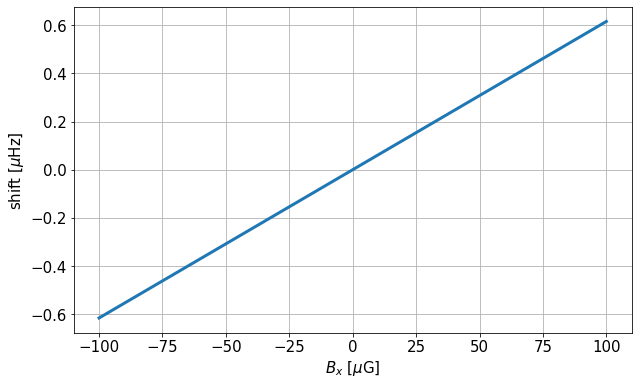

In [40]:
Bxlist = np.linspace(-100e-6,100e-6,501)
Bmot = 6e-5

shift = []
for Bx in Bxlist:
    j = 6
    JshiftUp = np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx+Bmot)**2
    JshiftDown = np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx-Bmot)**2

    j = 4
    EshiftUp = np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx+Bmot)**2
    EshiftDown = np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx-Bmot)**2
    
    shift.append(((EshiftUp-JshiftUp) - (EshiftDown-JshiftDown))*1e6)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(Bxlist*1e6, shift, lw = 3)

ax.set_xlabel('$B_x$ [$\mu$G]')
ax.set_ylabel(f'shift [$\mu$Hz]')
ax.grid(True)
set_fontsize(ax, 15)

### Couplings in J=1 due to the $-\frac{\mu_2}{I_2}\left(\vec I_2 \cdot \vec B\right)$ term in the Zeeman Hamiltonian

In [41]:
Bx = 10e-6
Bmot = 6e-5

j = 6
JshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx+Bmot)**2
JshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx-Bmot)**2

j = 4
EshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx+Bmot)**2
EshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx-Bmot)**2

print(f"frequency shift : {((EshiftUp-JshiftUp) - (EshiftDown-JshiftDown))*1e6:.2e} muHz")

frequency shift : 3.21e-01 muHz


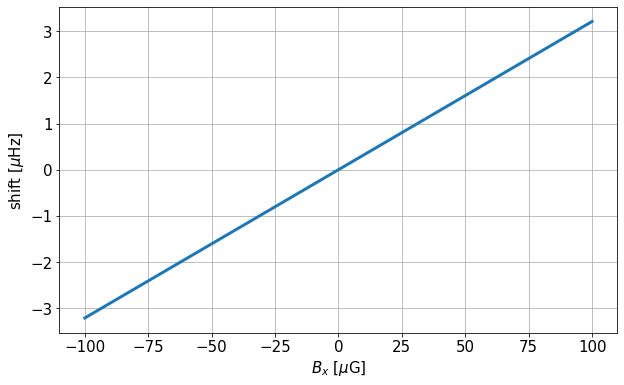

In [42]:
Bxlist = np.linspace(-100e-6,100e-6,501)
Bmot = 6e-5

shift = []
for Bx in Bxlist:
    j = 6
    JshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx+Bmot)**2
    JshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx-Bmot)**2

    j = 4
    EshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx+Bmot)**2
    EshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx-Bmot)**2
    
    shift.append(((EshiftUp-JshiftUp) - (EshiftDown-JshiftDown))*1e6)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(Bxlist*1e6, shift, lw = 3)

ax.set_xlabel('$B_x$ [$\mu$G]')
ax.set_ylabel(f'shift [$\mu$Hz]')
ax.grid(True)
set_fontsize(ax, 15)

## Both couplings in J=1 due to $I_1,~I_2$ terms in the Zeeman Hamiltonian

### CeNTREX

In [43]:
Bx = 10e-6
Bmot = 6e-5

j = 6
JshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx+Bmot)**2 + \
           np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx+Bmot)**2
JshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx-Bmot)**2 + \
             np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx-Bmot)**2
j = 4
EshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx+Bmot)**2 + \
           np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx+Bmot)**2
EshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx-Bmot)**2 + \
             np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx-Bmot)**2

print(f"frequency shift : {((EshiftUp-JshiftUp) - (EshiftDown-JshiftDown))*1e6:.2e} muHz")

frequency shift : 3.83e-01 muHz


### Ramsey

In [44]:
Bx = 50e-3
Bmot = 6e-5

j = 6
JshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx+Bmot)**2 + \
           np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx+Bmot)**2
JshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(30e3) * (Bx-Bmot)**2 + \
             np.sum(np.abs(HZxTl_m[j,:])**2)/(-120e3) * (Bx-Bmot)**2
j = 4
EshiftUp = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx+Bmot)**2 + \
           np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx+Bmot)**2
EshiftDown = np.sum(np.abs(HZxF_m[j,:])**2)/(15e3) * (Bx-Bmot)**2 + \
             np.sum(np.abs(HZxTl_m[j,:])**2)/(120e3) * (Bx-Bmot)**2

print(f"frequency shift : {((EshiftUp-JshiftUp) - (EshiftDown-JshiftDown))*1e3:.2e} mHz")

frequency shift : 1.91e+00 mHz
